# Question 2

In [43]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
# open the file
file_path = 'co2_emissions.csv'
df = pd.read_csv(file_path,index_col='Country')

In [45]:
df.head()

,Energy use (kg of oil equivalent per capita),CO2 emissions (kt),CPIA policy and institutions for environmental sustainability rating (1=low to 6=high),GDP (current US$),"School enrollment, primary (% gross)",Employment in industry (% of total employment) (modeled ILO estimate),Population growth (annual %),Population
Country,,,,,,,,
Afghanistan,3257.257238,8709.470000,2.00,1.450216e+10,110.007507,18.340073,2.665628,42239854.0
Albania,808.455840,4383.200000,3.00,2.297768e+10,95.606712,21.400145,-1.148418,2745972.0
Algeria,1333.136069,161563.000000,3.25,2.398995e+11,108.761642,30.850998,1.554019,45606480.0
Andorra,3257.257238,448.884399,3.00,3.727674e+09,90.147346,19.715058,0.330182,80088.0
Angola,540.864116,19814.500000,2.50,8.472296e+10,88.574997,5.673967,3.030996,36684202.0


## Splitting the data

In [46]:
X = df.drop('CO2 emissions (kt)', axis=1)  
y = df['CO2 emissions (kt)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
print(f'Trainning set: {X_train.shape}, {y_train.shape}')
print(f'Testing set: {X_test.shape}, {y_test.shape}')

Trainning set: (173, 7), (173,)
Testing set: (44, 7), (44,)


## Linear regression

In [48]:
model = LinearRegression()

model.fit(X_train, y_train) #trainning the model

LinearRegression()

In [49]:
y_pred = model.predict(X_test) #testing the model

### Model evaluation

In [50]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
intersection = model.intercept_
coeficiente = model.coef_
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
cols=X.columns.tolist()
i=0
for col in cols:
    print(f'The slope for the variable {col} is {coeficiente[i]} ')
    i=1+i


print(f'The intersection with the y-axis is {intersection}')

Mean Squared Error: 1512263400826.7317
R-squared: -2.6806837579497826
The slope for the variable Energy use (kg of oil equivalent per capita) is -2.9764985214936734 
The slope for the variable CPIA policy and institutions for environmental sustainability rating (1=low to 6=high) is -45045.10076179233 
The slope for the variable GDP (current US$) is 4.4394080291968083e-07 
The slope for the variable School enrollment, primary (% gross) is 15.771076532560578 
The slope for the variable Employment in industry (% of total employment) (modeled ILO estimate) is -674.6940762192371 
The slope for the variable Population growth (annual %) is -10330.53899482057 
The slope for the variable Population is 0.0011755968956224966 
The intersection with the y-axis is 97168.43890683085


## Hypothesis GDP increase by 10%

In [51]:
factor = 1.1
df_GDP_increase = df.copy()  
df_GDP_increase['GDP (current US$)'] = df_GDP_increase['GDP (current US$)'] * factor
x=df_GDP_increase.drop('CO2 emissions (kt)', axis=1)

## Using the model

In [52]:
y_pred=model.predict(x)
delta_y=y_pred-df['CO2 emissions (kt)']

In [53]:
delta_y=delta_y.to_frame().rename(columns={'CO2 emissions (kt)': 'Delta'})
pd_values=pd.concat([df['CO2 emissions (kt)'], delta_y], axis=1)


In [54]:
pd_values['CO2 emissions (kt)_p']=y_pred.tolist()

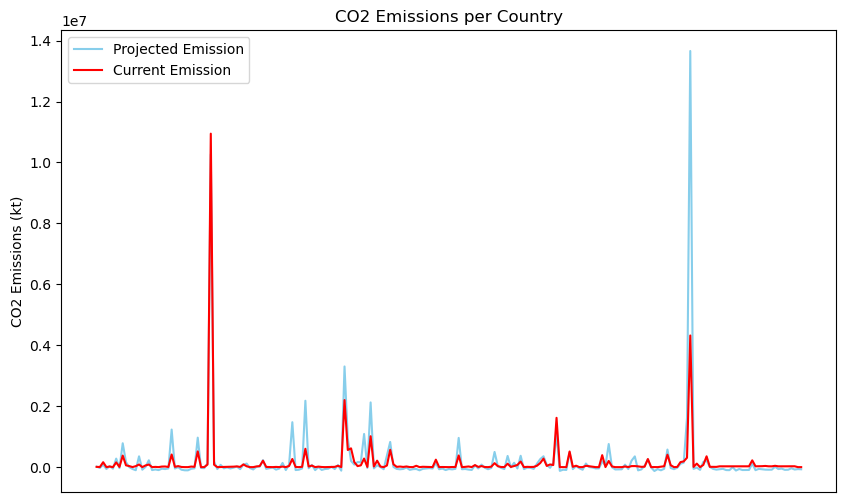

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el gráfico de barras
plt.plot(df.index, y_pred, color='skyblue',label="Projected Emission")
plt.plot(df.index, df['CO2 emissions (kt)'], color='red',label='Current Emission')
# Agregar etiquetas y título
plt.xlabel('')
plt.ylabel('CO2 Emissions (kt)')
plt.title('CO2 Emissions per Country')
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.legend()
plt.show()

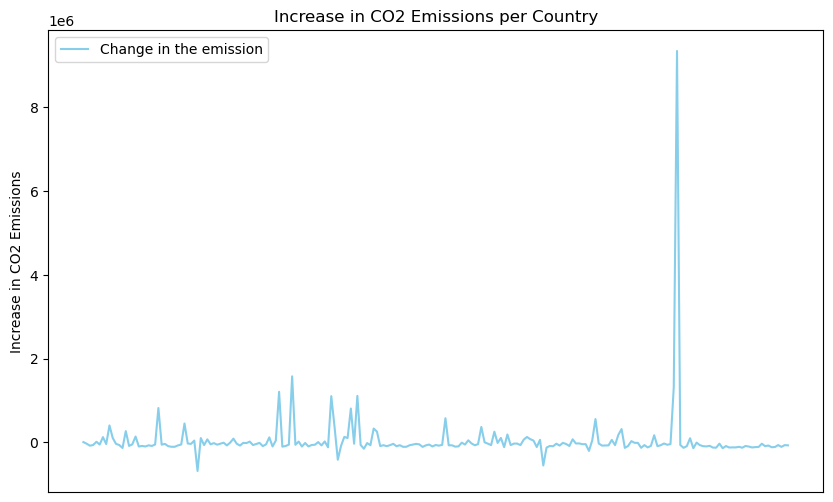

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el gráfico de barras
plt.plot(df.index, delta_y, color='skyblue',label="Change in the emission")
#plt.plot(df.index, df['CO2 emissions (kt)'], color='red',label='Current Emission')
# Agregar etiquetas y título
plt.xlabel('')
plt.ylabel('Increase in CO2 Emissions')
plt.title('Increase in CO2 Emissions per Country')
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.legend()
plt.show()